In [1]:
from gensim.models import Word2Vec
import numpy as np
from nltk.tokenize import word_tokenize
import nltk

### Cogemos un modelo que valga para tokenizar, en este caso utilizaremos "punkt"

In [2]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar.torresrodrigue\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


True

El embedding consiste en que para una palabra se va a generar un array de caracteristicas.

In [3]:
text1 = "The Titanic sailed with hope and illusion to cross the Atlantic."
text2 = "The sinking of the Titanic was one of the greatest maritime tragedies."

#Tequenizacion de las frases
token1 = word_tokenize(text1.lower())
token2 = word_tokenize(text2.lower())

# Entrenamos el modelo, se le pasa ula lista de sentencias, frases, transformados en tokens
model = Word2Vec([token1,token2],vector_size=10,window=5,min_count=1,sg=0)

In [4]:
model.wv["titanic"]

array([ 0.07380505, -0.01533471, -0.04536613,  0.06554051, -0.0486016 ,
       -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448818],
      dtype=float32)

In [5]:
model.wv.key_to_index

{'the': 0,
 'titanic': 1,
 'of': 2,
 '.': 3,
 'to': 4,
 'sailed': 5,
 'with': 6,
 'hope': 7,
 'and': 8,
 'illusion': 9,
 'tragedies': 10,
 'maritime': 11,
 'atlantic': 12,
 'sinking': 13,
 'was': 14,
 'one': 15,
 'greatest': 16,
 'cross': 17}

In [6]:
# Palabras similares a... muestrame las 3 mas aprecidas
model.wv.most_similar("maritime",topn=3)

[('one', 0.7191647887229919),
 ('was', 0.5374302268028259),
 ('titanic', 0.3582616448402405)]

In [7]:
# Palabras similares a... y que no tengan que ver con ...
model.wv.most_similar(positive=["the","maritime"],negative=["and"],topn=3)

[('titanic', 0.5306490063667297),
 ('tragedies', 0.3752540647983551),
 ('one', 0.3642173409461975)]

In [8]:
# Nos da la distancia entre las dos palabras indicadas
model.wv.distance("the","maritime")

0.7727770805358887

In [9]:
embedding1 = sum(model.wv[w] for w in token1) / len(token1)
embedding2 = sum(model.wv[w] for w in token2) / len(token2)

from scipy.spatial import distance
cosine_dist = distance.cosine(embedding1,embedding2)
print(cosine_dist)


0.5285577476024628


# Ejercicio

In [10]:
texto1 = """Lo recuerdo (yo no tengo derecho a pronunciar ese verbo sagrado, sólo un hombre en la tierra 
tuvo derecho y ese hombre ha muerto) con una oscura pasionaria en la mano, viéndola como nadie la ha visto, 
aunque la mirara desde el crepúsculo del día hasta el de la noche, toda una vida entera. Lo recuerdo, la cara 
taciturna y aindiada y singularmente remota, detrás del cigarrillo. Recuerdo (creo) sus manos afiladas de trenzado. 
Recuerdo cerca de esas manos un mate, con las armas de la Banda Oriental; recuerdo en la ventana de la casa una 
estera amarilla, con un vago paisaje lacustre. Recuerdo claramente su voz; la voz pausada, resentida y nasal del 
orillero antiguo, sin los silbidos italianos de ahora. Más de tres veces no lo vi; la última, en 1887... Me parece 
muy feliz el proyecto de que todos aquellos que lo trataron escriban sobre él; mi testimonio será acaso el más breve 
y sin duda el más pobre, pero no el menos imparcial del volumen que editarán ustedes."""

texto2 = """ Mi deplorable condición de argentino me impedirá incurrir en el ditirambo -género obligatorio en el Uruguay, 
cuando el tema es un uruguayo. Literato, cajetilla, porteño; Funes no dijo esas injuriosas palabras, pero de un modo 
suficiente me consta que yo representaba para él esas desventuras. Pedro Leandro Ipuche ha escrito que Funes era un precursor 
de los superhombres, "un Zarathustra cimarrón y vernáculo "; no lo discuto, pero no hay que olvidar que era también un 
compadrito de Fray Bentos, con ciertas incurables limitaciones."""

texto3 = """Mi primer recuerdo de Funes es muy perspicuo. Lo veo en un atardecer de marzo o febrero del año 84. Mi padre, 
ese año, me había llevado a veranear a Fray Bentos. Yo volvía con mi primo Bernardo Haedo de la estancia de San Francisco. 
Volvíamos cantando, a caballo, y ésa no era la única circunstancia de mi felicidad. Después de un día bochornoso, una enorme 
tormenta color pizarra había escondido el cielo. La alentaba el viento del Sur, ya se enloquecían los árboles; yo tenía el 
temor la esperanza) de que nos sorprendiera en un descampado el agua elemental. Corrimos una especie de carrera con la tormenta."""

In [11]:
import re

# Limpieza de cada texto
texto1 = re.sub(r'[^\w\s]', ' ', texto1)
texto2 = re.sub(r'[^\w\s]', ' ', texto2)
texto3 = re.sub(r'[^\w\s]', ' ', texto3)

#Tequenizacion de las frases
token1 = word_tokenize(texto1.lower())
token2 = word_tokenize(texto2.lower())
token3 = word_tokenize(texto3.lower())

# Entrenamos el modelo, se le pasa ula lista de sentencias, frases, transformados en tokens
model = Word2Vec([token1,token2,token3],vector_size=10,window=5,min_count=1,sg=0)

In [12]:
embedding1 = sum(model.wv[w] for w in token1) / len(token1)
embedding2 = sum(model.wv[w] for w in token2) / len(token2)
embedding3 = sum(model.wv[w] for w in token3) / len(token3)

from scipy.spatial import distance
cosine_dist = distance.cosine(embedding1,embedding2)
print(cosine_dist)

0.25668078660964966


In [13]:
print('Palabra mas parecida a "cigarrillo":',model.wv.most_similar("cigarrillo",topn=3))
print(model.wv.most_similar(positive=["mi","felicidad"],negative=["bochornoso"],topn=3))
print(model.wv.distance("felicidad","bochornoso"))

Palabra mas parecida a "cigarrillo": [('remota', 0.7052414417266846), ('sus', 0.6605857014656067), ('compadrito', 0.6309230327606201)]
[('banda', 0.7925114631652832), ('estera', 0.7708041071891785), ('parece', 0.7571136951446533)]
0.4320305585861206


### Grafica

In [14]:
ln = np.zeros((len(model.wv.index_to_key), 10), dtype=float)
for i, k in enumerate(model.wv.index_to_key):
  v = model.wv[k]
  ln[i] = v

ln

array([[-0.00320682,  0.00180127,  0.05348885, ...,  0.09104067,
        -0.05265529, -0.04057723],
       [ 0.07528784, -0.01534194, -0.04354919, ...,  0.01137994,
        -0.08463925, -0.09624124],
       [ 0.07503524,  0.05016708,  0.06976303, ...,  0.05923372,
        -0.07735602, -0.04212149],
       ...,
       [-0.06371602,  0.03094918,  0.00878739, ..., -0.01635744,
        -0.09560081, -0.02727511],
       [ 0.01454997,  0.06511271,  0.10103463, ..., -0.00919518,
         0.00357021,  0.06442598],
       [ 0.04573371,  0.04571282,  0.09580258, ..., -0.05178645,
        -0.02976025,  0.03962326]])

### Un scatter simple

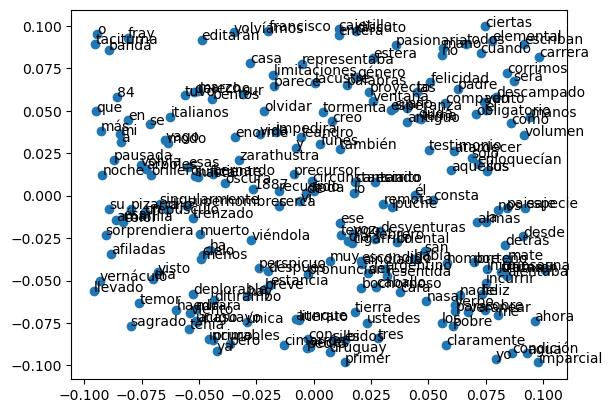

In [15]:
import matplotlib.pyplot as plt

x = ln[:,0]
y = ln[:,1]

plt.scatter(x,y)

for i, txt in enumerate(model.wv.key_to_index):
    plt.annotate(txt, (x[i], y[i]))

plt.show()


### Ahora utilizaremos plotly

https://builtin.com/data-science/python-plotly

In [16]:
import pandas as pd
from sklearn.decomposition import PCA

#  Hacemos un pca para pasar de las 10 columnas que tenemos a 2 para poder representar
pca = PCA(n_components=3)
pca_transf = pca.fit_transform(ln)

# Ahora necesitamos pasar a un Dataframe los datos
df = pd.DataFrame(pca_transf) 


In [17]:
import plotly.express as px

# Necesitamos una lista con las palabras para ponerlas en el grafico
words = model.wv.index_to_key
words

fig = px.scatter_3d(df, x=0, y=1, z=2,
              color=2)
fig.show()
